# **2° PROYECTO INDIVIDUAL: DATA ANALYTICS**

 Dentro del proyecto, trabajaremos con la **tasa de homicidios en siniestros viales** a través de un dataset de la ciudad de Buenos Aires, lo que aportará, gracias a ser una variable cuantitativa discreta, información clara y visual para el informe.







*Utilizaré algunas librerías para trabajar*

In [4]:
import pandas as pd                   # Para la manipulación y análisis de datos en Python.
import csv                            # Permite leer y escribir datos en formato csv.
import matplotlib.pyplot as plt       # Es una biblioteca de visualización en Python para crear gráficos y visualizaciones.
import openpyxl                       # Esto es útil cuando necesitas procesar datos contenidos en hojas de cálculo de Excel.
import seaborn as sns                 # Ofrece una interfaz de alto nivel para crear gráficos estadísticos atractivos y informativos.

*Subo los archivos CSV a mi entorno de Google Colab utilizando la función files.upload() de la biblioteca google.colab.*

In [5]:
from google.colab import files
uploaded = files.upload()

Saving homicidios.xlsx to homicidios (1).xlsx


In [6]:
# Especifica la ruta del archivo Excel (.xlsx) que deseas abrir
archivo_xlsx = 'homicidios.xlsx'  # Reemplaza 'homicidios.xlsx' con la ruta de tu archivo Excel

# Carga el archivo Excel en un DataFrame de pandas
df_homicidios = pd.read_excel(archivo_xlsx, engine='openpyxl')

# Especifica la ruta donde deseas guardar el archivo CSV resultante
archivo_csv = 'homicidios.csv'  # Puedes cambiar el nombre y la ubicación según tus preferencias

# Guarda el DataFrame en un archivo CSV
df_homicidios.to_csv(archivo_csv, index=False)

print(f'Archivo CSV guardado en: {archivo_csv}')

Archivo CSV guardado en: homicidios.csv


*Ahora mostramos el archivo*

In [7]:
print(df_homicidios.head())

          ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA HH  \
0  2016-0001           1 2016-01-01  2016   1   1  04:00:00  4   
1  2016-0002           1 2016-01-02  2016   1   2  01:15:00  1   
2  2016-0003           1 2016-01-03  2016   1   3  07:00:00  7   
3  2016-0004           1 2016-01-10  2016   1  10  00:00:00  0   
4  2016-0005           1 2016-01-21  2016   1  21  05:20:00  5   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...     NaN   
1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ  ...     NaN   
2                         AV ENTRE RIOS 2034       AVENIDA  ...  2034.0   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA  ...     NaN   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA  ...     NaN   

                                 Cruce  \
0  FERNANDEZ DE LA CRUZ, F., GRAL. AV.   
1                  DE LOS CORRALES AV.   
2                         

In [8]:
# Veamos la información general del archivo:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

***COMENZAMOS CON EL ANÁLISIS ETL***

In [9]:
# Vemos si tiene datos nulos y sumamos:
df_homicidios.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

***Podemos eliminar las filas con valores nulos***

In [10]:
# Verificar cuántos valores nulos hay en cada columna
valores_nulos = df_homicidios.isnull().sum()

# Eliminar las filas que contienen datos nulos
df_homicidios_sin_nulos = df_homicidios.dropna()

# Verificar nuevamente cuántos valores nulos hay en cada columna en el nuevo DataFrame
valores_nulos_actualizados = df_homicidios_sin_nulos.isnull().sum()

# Imprimir el número de filas eliminadas
filas_eliminadas = len(df_homicidios) - len(df_homicidios_sin_nulos)
print(f'Filas eliminadas: {filas_eliminadas}')

# Imprimir el número de valores nulos en cada columna antes y después de la eliminación
print("Valores nulos antes de la eliminación:")
print(valores_nulos)
print("\nValores nulos después de la eliminación:")
print(valores_nulos_actualizados)

Filas eliminadas: 696
Valores nulos antes de la eliminación:
ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Valores nulos después de la eliminación:
ID                       0.0
N_VICTIMAS               0.0
FECHA                    0.0
AAAA                     0.0
MM                       0.0
DD                       0.0
HORA                     0.0
HH                       0.0
LUGAR_DEL_HECHO          0.0
TIPO_DE_CALLE 

***Eliminamos columnas con datos duplicados, como detallamos en la lista a continuación ya que son relevantes y muchos se repiten en otras***

In [11]:
# Lista de columnas a eliminar
columnas_a_eliminar = ["AAAA", "HH", "Altura", "Cruce", "XY (CABA)", "Calle","TIPO_DE_CALLE","Dirección Normalizada"]

# Eliminamos las columnas especificadas
df_homicidios_modified = df_homicidios.drop(columnas_a_eliminar, axis=1)

# Mostramos las primeras filas del DataFrame resultante
print(df_homicidios_modified.head())


          ID  N_VICTIMAS      FECHA  MM  DD      HORA  \
0  2016-0001           1 2016-01-01   1   1  04:00:00   
1  2016-0002           1 2016-01-02   1   2  01:15:00   
2  2016-0003           1 2016-01-03   1   3  07:00:00   
3  2016-0004           1 2016-01-10   1  10  00:00:00   
4  2016-0005           1 2016-01-21   1  21  05:20:00   

                             LUGAR_DEL_HECHO  COMUNA         pos x  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       8  -58.47533969   
1          AV GRAL PAZ  Y AV DE LOS CORRALES       9  -58.50877521   
2                         AV ENTRE RIOS 2034       1  -58.39040293   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       8  -58.46503904   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        1  -58.38718297   

          pos y   PARTICIPANTES VICTIMA    ACUSADO  
0  -34.68757022       MOTO-AUTO    MOTO       AUTO  
1  -34.66977709  AUTO-PASAJEROS    AUTO  PASAJEROS  
2  -34.63189362       MOTO-AUTO    MOTO       AUTO  
3  -34.68092974         

***Una vez finalizada la transformación de las columnas, procedemos a normalizar los nombres de algunas de las columnas, como vemos a continuación***

In [12]:
# Crear un diccionario con los cambios de nombres
cambios_de_nombres = {
    'N_VICTIMAS': 'N° DE VÍCTIMAS',
    'LUGAR_DEL_HECHO': 'LUGAR DEL HECHO', 'MM': 'MES', 'DD': 'DÍA'}

# Renombrar las columnas usando el diccionario
df_homicidios_modified.rename(columns=cambios_de_nombres, inplace=True)

# Mostrar las primeras filas del DataFrame con los nombres de las columnas actualizados
print(df_homicidios_modified.head())


          ID  N° DE VÍCTIMAS      FECHA  MES  DÍA      HORA  \
0  2016-0001               1 2016-01-01    1    1  04:00:00   
1  2016-0002               1 2016-01-02    1    2  01:15:00   
2  2016-0003               1 2016-01-03    1    3  07:00:00   
3  2016-0004               1 2016-01-10    1   10  00:00:00   
4  2016-0005               1 2016-01-21    1   21  05:20:00   

                             LUGAR DEL HECHO  COMUNA         pos x  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       8  -58.47533969   
1          AV GRAL PAZ  Y AV DE LOS CORRALES       9  -58.50877521   
2                         AV ENTRE RIOS 2034       1  -58.39040293   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       8  -58.46503904   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        1  -58.38718297   

          pos y   PARTICIPANTES VICTIMA    ACUSADO  
0  -34.68757022       MOTO-AUTO    MOTO       AUTO  
1  -34.66977709  AUTO-PASAJEROS    AUTO  PASAJEROS  
2  -34.63189362       MOTO-AUTO    MOTO  

***Visualizamos el dataframe completo y ordenado***

In [13]:
df_homicidios_modified

,ID,N° DE VÍCTIMAS,FECHA,MES,DÍA,HORA,LUGAR DEL HECHO,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,1,1,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,2,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,1,3,07:00:00,AV ENTRE RIOS 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,1,10,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,1,21,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,12,13,17:10:00,AV. RIESTRA Y MOM,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,12,20,01:10:00,AU DELLEPIANE Y LACARRA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,12,30,00:43:00,AV. GAONA Y TERRADA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,12,15,10:30:00,AV. EVA PERON 4071,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [14]:
df_homicidios_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N° DE VÍCTIMAS   696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   MES              696 non-null    int64         
 4   DÍA              696 non-null    int64         
 5   HORA             696 non-null    object        
 6   LUGAR DEL HECHO  696 non-null    object        
 7   COMUNA           696 non-null    int64         
 8   pos x            696 non-null    object        
 9   pos y            696 non-null    object        
 10  PARTICIPANTES    696 non-null    object        
 11  VICTIMA          696 non-null    object        
 12  ACUSADO          696 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 70.8+ KB


**INFO DEL DF:** los tipos de variables de sus columnas, son las siguientes:



*   1) ID: Variable categórica (object).

*   2) N° DE VÍCTIMAS: Variable numérica discreta (int64).

*   3) FECHA: Variable de fecha y hora (datetime64[ns]).

*   4) MES: Variable numérica discreta (int64).

*   5) DÍA: Variable numérica discreta (int64).

*   6) HORA: Variable categórica (object).

*   7) LUGAR DEL HECHO: Variable categórica (object).

*   8) COMUNA: Variable numérica discreta (int64).

*   9) pos x: Variable categórica (object).

*   10) pos y: Variable categórica (object).

*   11) PARTICIPANTES: Variable categórica (object).

*   12) VICTIMA: Variable categórica (object).

*   13) ACUSADO: Variable categórica (object).


---

Estos tipos de variables nos ayudarán a comprender qué tipo de análisis y visualizaciones son apropiados para cada columna en tu conjunto de datos. Por ejemplo, las variables categóricas son adecuadas para gráficos de barras y tablas de frecuencia, mientras que las variables numéricas pueden utilizarse en gráficos de dispersión, histogramas y análisis estadísticos.

---



In [15]:
# Renombrar la columna "pos x" a "POS X"
df_homicidios_modified = df_homicidios_modified.rename(columns={'pos x': 'POS X'})

# Renombrar la columna "pos y" a "POS Y"
df_homicidios_modified = df_homicidios_modified.rename(columns={'pos y': 'POS Y'})
df_homicidios_modified

,ID,N° DE VÍCTIMAS,FECHA,MES,DÍA,HORA,LUGAR DEL HECHO,COMUNA,POS X,POS Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,1,1,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,2,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,1,3,07:00:00,AV ENTRE RIOS 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,1,10,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,1,21,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,12,13,17:10:00,AV. RIESTRA Y MOM,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,12,20,01:10:00,AU DELLEPIANE Y LACARRA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,12,30,00:43:00,AV. GAONA Y TERRADA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,12,15,10:30:00,AV. EVA PERON 4071,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


***Podemos ver que hay valores en las columnas con las siglas "SD", (sin datos según el tipo de víctima)***

In [16]:
# Encontrar en qué columnas se encuentra el valor "SD"
columns_with_sd = df_homicidios_modified.columns[df_homicidios_modified.eq('SD').any()]

# Mostrar las columnas con "SD"
print("Columnas con 'SD':")
for column in columns_with_sd:
    print(f"Columna '{column}': {df_homicidios_modified[column].isin(['SD']).sum()} veces")

Columnas con 'SD':
Columna 'HORA': 1 veces
Columna 'LUGAR DEL HECHO': 1 veces
Columna 'VICTIMA': 9 veces
Columna 'ACUSADO': 23 veces


In [17]:
# Reemplazar "SD" por "0" en todo el DataFrame
df_homicidios_modified = df_homicidios_modified.replace('SD', '0')
df_homicidios_modified

,ID,N° DE VÍCTIMAS,FECHA,MES,DÍA,HORA,LUGAR DEL HECHO,COMUNA,POS X,POS Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,1,1,04:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,2,01:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,1,3,07:00:00,AV ENTRE RIOS 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,1,10,00:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,0
4,2016-0005,1,2016-01-21,1,21,05:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,12,13,17:10:00,AV. RIESTRA Y MOM,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,12,20,01:10:00,AU DELLEPIANE Y LACARRA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,12,30,00:43:00,AV. GAONA Y TERRADA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,12,15,10:30:00,AV. EVA PERON 4071,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [18]:
# Veamos como queda ahora.
print("Columnas con 'SD':")
for column in columns_with_sd:
    print(f"Columna '{column}': {df_homicidios_modified[column].isin(['SD']).sum()} veces")

Columnas con 'SD':
Columna 'HORA': 0 veces
Columna 'LUGAR DEL HECHO': 0 veces
Columna 'VICTIMA': 0 veces
Columna 'ACUSADO': 0 veces


In [19]:
# Verificar duplicados en el dataframe y observamos que no existen
duplicados = df_homicidios_modified.duplicated()
print(duplicados)

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Length: 696, dtype: bool


In [20]:
df_homicidios_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N° DE VÍCTIMAS   696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   MES              696 non-null    int64         
 4   DÍA              696 non-null    int64         
 5   HORA             696 non-null    object        
 6   LUGAR DEL HECHO  696 non-null    object        
 7   COMUNA           696 non-null    int64         
 8   POS X            696 non-null    object        
 9   POS Y            696 non-null    object        
 10  PARTICIPANTES    696 non-null    object        
 11  VICTIMA          696 non-null    object        
 12  ACUSADO          696 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 70.8+ KB


<ipython-input-21-33f7ada84636>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=top_lugares_con_mas_victimas.index, y=top_lugares_con_mas_victimas.values, ci=None)


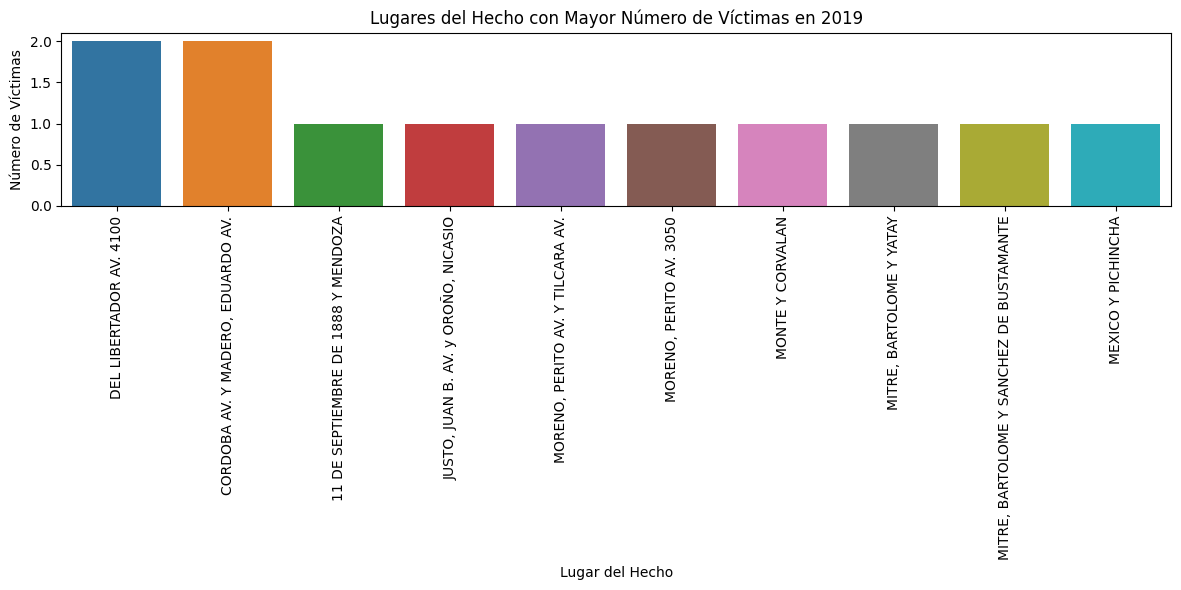

In [21]:
# Graficamos para visualizar algunos de los datos filtrados del año 2019
df_2019 = df_homicidios_modified[df_homicidios_modified['FECHA'].dt.year == 2019]

# Agrupa los datos por "LUGAR DEL HECHO" y suma el número de víctimas para cada lugar
lugares_con_mas_victimas = df_2019.groupby('LUGAR DEL HECHO')['N° DE VÍCTIMAS'].sum()

# Ordena los lugares por el número de víctimas en orden descendente y selecciona los 10 primeros
top_lugares_con_mas_victimas = lugares_con_mas_victimas.sort_values(ascending=False).head(10)

# Crea un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_lugares_con_mas_victimas.index, y=top_lugares_con_mas_victimas.values, ci=None)
plt.title('Lugares del Hecho con Mayor Número de Víctimas en 2019')
plt.xticks(rotation=90)
plt.xlabel('Lugar del Hecho')
plt.ylabel('Número de Víctimas')
plt.tight_layout()

# Muestra el gráfico
plt.show()


In [22]:
# Como se puede observar, el lugar de hecho con mayores víctimas de tránsito en 2019 es avenida del libertador 4100.

***Por curiosidad, graficamos los siniestros de las víctimas que manejaban moto. Podemos observar en el gráfico que el 42% de las víctimas, se trasladaban en moto***

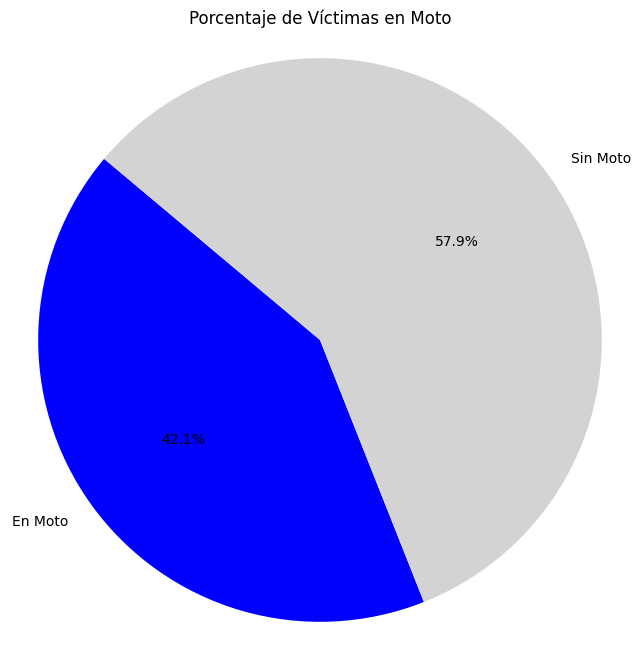

In [23]:
# Filtrar las filas donde las víctimas estaban en moto
victimas_en_moto = df_homicidios_modified[df_homicidios_modified['VICTIMA'] == 'MOTO']

# Contar el número de víctimas en moto
num_victimas_en_moto = victimas_en_moto['N° DE VÍCTIMAS'].sum()

# Contar el número de víctimas que no estaban en moto (para el etiquetado)
num_victimas_sin_moto = df_homicidios_modified[df_homicidios_modified['VICTIMA'] != 'MOTO']['N° DE VÍCTIMAS'].sum()

# Crear una lista con los valores para el gráfico de pastel
valores = [num_victimas_en_moto, num_victimas_sin_moto]

# Etiquetas para las secciones del gráfico
etiquetas = ['En Moto', 'Sin Moto']

# Colores para las secciones del gráfico
colores = ['blue', 'lightgray']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Víctimas en Moto')
plt.axis('equal')  # Para asegurarse de que el gráfico sea un círculo

# Mostrar el gráfico de pastel
plt.show()


***Ahora visualizamos la hoja "VICTIMAS" del archivo homicidios***

In [24]:
archivo_excel = 'homicidios.xlsx'
nombre_hoja = 'VICTIMAS'

# Crea un objeto ExcelFile para el archivo Excel
xls = pd.ExcelFile(archivo_excel)

# Lee la hoja "VICTIMAS" en un DataFrame
df_victimas = pd.read_excel(xls, sheet_name=nombre_hoja)

# Ahora puedes trabajar con el DataFrame df_victimas que contiene la hoja "VICTIMAS"
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [25]:
# Veamos la info general del archivo
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [26]:
# Verificar cuántos valores nulos hay en cada columna
valores_nulos = df_victimas.isnull().sum()

# Eliminar las filas que contienen datos nulos
df_victimas_sin_nulos = df_victimas.dropna()

***Podemos ver que no tiene archivos nulos***.

In [27]:
df_victimas_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [28]:
df_victimas_sin_nulos

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [29]:
# Eliminar la columna "AAAA"
df_victimas_sin_nulos = df_victimas_sin_nulos.drop(['AAAA'], axis=1)

# Renombrar la columna "MM" a "MES"
df_victimas_sin_nulos = df_victimas_sin_nulos.rename(columns={'MM': 'MES'})

# Renombrar la columna "DD" a "DÍA"
df_victimas_sin_nulos = df_victimas_sin_nulos.rename(columns={'DD': 'DÍA'})

# Renombrar la columna "ID_hecho" a "ID_HECHO"
df_victimas_sin_nulos = df_victimas_sin_nulos.rename(columns={'ID_hecho': 'ID_HECHO'})

# Renombrar la columna "FECHA_FALLECIMIENTO" a "FECHA DE FALLECIMIENTO"
df_victimas_sin_nulos = df_victimas_sin_nulos.rename(columns={'FECHA_FALLECIMIENTO': 'FECHA DE FALLECIMIENTO'})

In [30]:
df_victimas_sin_nulos

,ID_HECHO,FECHA,MES,DÍA,ROL,VICTIMA,SEXO,EDAD,FECHA DE FALLECIMIENTO
0,2016-0001,2016-01-01,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [31]:
# También observamos valores con "SD". Con el mismo código, encontramos en qué columnas se encuentra el valor "SD"
columns_with_sd = df_victimas_sin_nulos.columns[df_victimas_sin_nulos.eq('SD').any()]

# Mostrar las columnas con "SD"
print("Columnas con 'SD':")
for column in columns_with_sd:
    print(f"Columna '{column}': {df_victimas_sin_nulos[column].isin(['SD']).sum()} veces")

Columnas con 'SD':
Columna 'ROL': 11 veces
Columna 'VICTIMA': 9 veces
Columna 'SEXO': 6 veces
Columna 'EDAD': 53 veces
Columna 'FECHA DE FALLECIMIENTO': 68 veces


In [32]:
# Reemplazar "SD" por "0" en todo el DataFrame ya que no nos aporta información.
df_victimas_sin_nulos = df_victimas_sin_nulos.replace('SD', '0')
df_victimas_sin_nulos

,ID_HECHO,FECHA,MES,DÍA,ROL,VICTIMA,SEXO,EDAD,FECHA DE FALLECIMIENTO
0,2016-0001,2016-01-01,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,1,10,CONDUCTOR,MOTO,MASCULINO,18,0
4,2016-0005,2016-01-21,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [33]:
# Veamos como queda ahora.
print("Columnas con 'SD':")
for column in columns_with_sd:
    print(f"Columna '{column}': {df_victimas_sin_nulos[column].isin(['SD']).sum()} veces")

Columnas con 'SD':
Columna 'ROL': 0 veces
Columna 'VICTIMA': 0 veces
Columna 'SEXO': 0 veces
Columna 'EDAD': 0 veces
Columna 'FECHA DE FALLECIMIENTO': 0 veces


In [34]:
df_victimas_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_HECHO                717 non-null    object        
 1   FECHA                   717 non-null    datetime64[ns]
 2   MES                     717 non-null    int64         
 3   DÍA                     717 non-null    int64         
 4   ROL                     717 non-null    object        
 5   VICTIMA                 717 non-null    object        
 6   SEXO                    717 non-null    object        
 7   EDAD                    717 non-null    object        
 8   FECHA DE FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 50.5+ KB


***INFO DEL DF: tipos de variables de las columnas***

*   1) ID_HECHO: Variable categórica (object).
*   2) FECHA: Variable de fecha y hora (datetime64[ns]).
*   4) MES: Variable numérica discreta (int64).
*   5) DÍA: Variable numérica discreta (int64).
*   6) ROL: Variable categórica (object).
*   7) VICTIMA: Variable categórica (object).
*   8) SEXO: Variable categórica (object).
*   9) EDAD: Variable categórica (object).
*  10) FECHA DE FALLECIMIENTO: Variable categórica (object).

---
Al igual que el df anterior, diferenciar las mismas, ayudan a determinar qué tipo de análisis y visualizaciones son apropiados para cada columna.

---














***Graficamos para visualizar un poco la información con alguna herramienta visual***

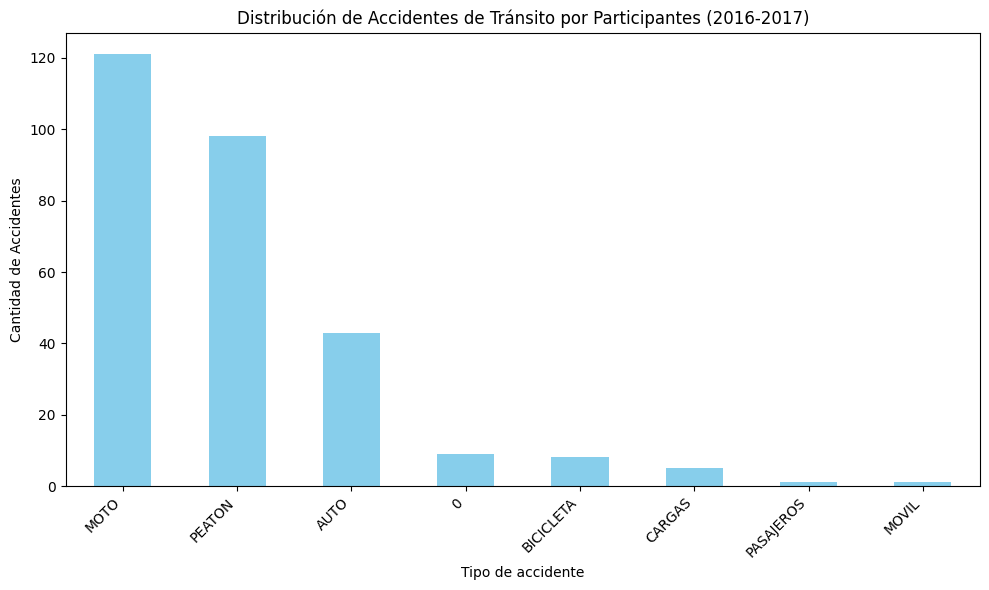

In [35]:
# Filtrar el DataFrame para el lapso de 2016 a 2017
df_lapso = df_victimas_sin_nulos[(df_victimas_sin_nulos['FECHA'] >= '2016-01-01') & (df_victimas_sin_nulos['FECHA'] <= '2017-12-31')]

# Contar los valores únicos en la columna "PARTICIPANTES"
conteo_participantes = df_lapso['VICTIMA'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_participantes.plot(kind='bar', color='skyblue')
plt.title('Distribución de Accidentes de Tránsito por Participantes (2016-2017)')
plt.xlabel('Tipo de accidente')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Podemos observar que en el lapso de 1 año, los accidentes de tránsito en moto, superan los 100 eventos.
Según un estudio reciente, los accidentes de motocicleta son mucho más costosos que los accidentes de coche, tanto en términos de vidas perdidas como de gastos médicos.

Citaré 4 puntos claves referido a por qué los accidentes en moto son más frecuentes.

1. Las motocicletas son menos visibles. Debido a que las motocicletas son mucho más pequeñas que los automóviles tradicionales, es más probable que sean golpeadas por otro vehículo. Con demasiada frecuencia, los motociclistas son atropellados cuando otro conductor intenta cambiar de carril porque el motociclista estaba en el punto ciego del conductor.

2. Las motocicletas son menos estables. La configuración de dos ruedas de una motocicleta carece de la estabilidad de la base de cuatro ruedas de un automóvil, lo que los hace más susceptibles a perder el equilibrio en curvas cerradas. Tener solo dos ruedas también hace que las motocicletas sean vulnerables a la superficie sobre la que conducen. La estabilidad del terreno es muy importante; un bache podría conducir a un incidente fatal.

3. Los motociclistas pueden tener menos visibilidad. Sin ventanas significa que no hay limpiaparabrisas. Cuando llueve, los motociclistas no tienen una visibilidad clara, lo que aumenta la probabilidad de un accidente.

4. Las motocicletas no tienen cinturones de seguridad. Cuando los motociclistas son atropellados por otra persona en la carretera, es muy probable que salgan despedidos de la bicicleta. Sin cinturones de seguridad, sus cuerpos quedan a merced del pavimento y otros vehículos***.***



---
##### **FUENTE DE INORMACIÓN ADICIONAL: https://www.carlsonabogados.com/news-and-update/son-las-motocicletas-peligrosas/**
---



***Determinación de valores atípicos u outliers***:

Visualización con Boxplot

Puedemos utilizar un gráfico de boxplot para visualizar outliers de manera efectiva. Un boxplot muestra la distribución de los datos y destaca los valores atípicos como puntos individuales fuera de los "bigotes" del gráfico.

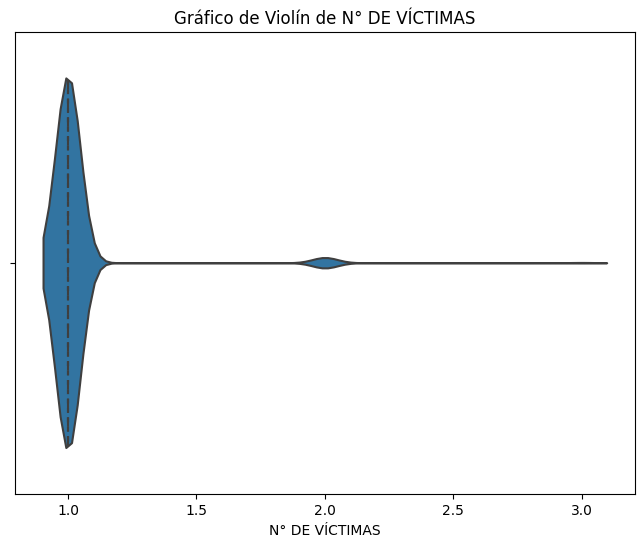

In [36]:
# Seleccionar la columna con datos numéricos para graficar outliers
columna_numerica = 'N° DE VÍCTIMAS'

# Crear un gráfico de violín para identificar outliers
plt.figure(figsize=(8, 6))
sns.violinplot(x=df_homicidios_modified[columna_numerica], inner="quart")
plt.title(f'Gráfico de Violín de {columna_numerica}')
plt.xlabel(columna_numerica)
plt.show()

In [37]:
# Con el siguiente código, creamos un documento HTML personalizado para poder agrandar la letra del comentario.
%%html
<!DOCTYPE html>
<html>
<head>
<style>
  /* Cambia el tamaño de letra según tus preferencias */
  p {
    font-size: 24px;
  }
</style>
</head>
<body>

<p>1° KPI Sugerido:* Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.</p>

</body>
</html>


***Se pueden apreciar a simple vista, valores atípicos en la columna N° DE VÍCTIMAS donde observamos 2 víctimas durante un siniestro vial, se muestra como un valor alejado.***

Reducción porcentual: 100.00%
Se cumple la reducción del 10% o más.


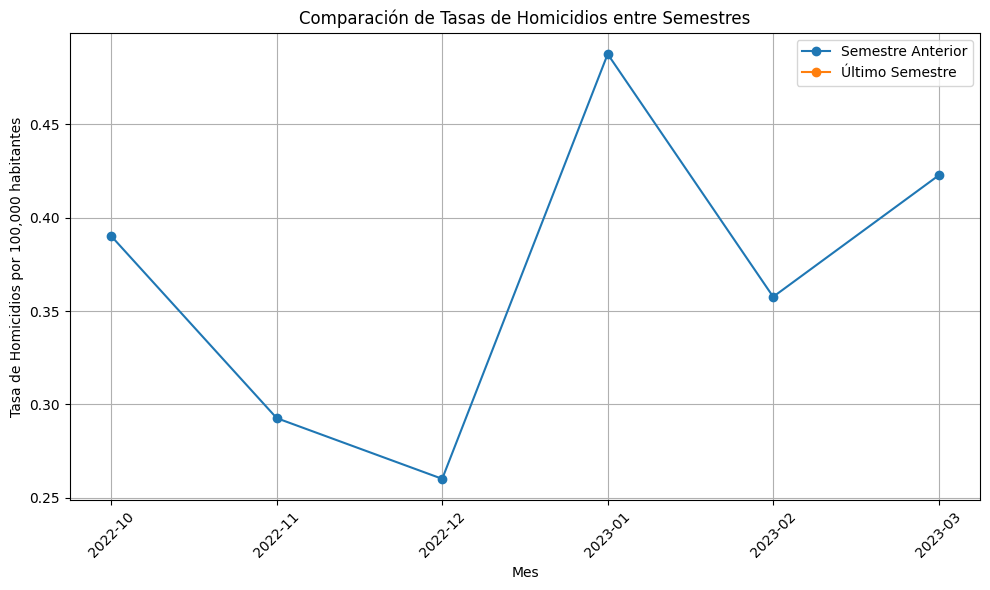

In [45]:
# Creamos un DataFrame con los datos proporcionados
data = {
    'N° DE VÍCTIMAS': [12, 9, 8, 15, 11, 13],
    'FECHA': pd.date_range(start='2022-10-01', end='2023-03-31', freq='M').strftime('%Y-%m'),
}

df = pd.DataFrame(data)

# Calcular la tasa de homicidios en siniestros viales para cada mes
poblacion_total = 3075646  # Población total
df['Tasa de Homicidios'] = (df['N° DE VÍCTIMAS'] / poblacion_total) * 100000

# Separar los datos en dos semestres
semestre_anterior = df[df['FECHA'] < '2023-04']
ultimo_semestre = df[df['FECHA'] >= '2023-04']

# Calcular la reducción porcentual
reduccion_porcentual = ((semestre_anterior['Tasa de Homicidios'].sum() - ultimo_semestre['Tasa de Homicidios'].sum()) / semestre_anterior['Tasa de Homicidios'].sum()) * 100

# Verificar si se cumple la reducción del 10%
if reduccion_porcentual >= 10:
    resultado = "Se cumple la reducción del 10% o más."
else:
    resultado = "No se cumple la reducción del 10%."

# Gráfico de líneas para visualizar las tasas de homicidios en ambos semestres
plt.figure(figsize=(10, 6))
plt.plot(semestre_anterior['FECHA'], semestre_anterior['Tasa de Homicidios'], marker='o', linestyle='-', label='Semestre Anterior')
plt.plot(ultimo_semestre['FECHA'], ultimo_semestre['Tasa de Homicidios'], marker='o', linestyle='-', label='Último Semestre')
plt.xlabel('Mes')
plt.ylabel('Tasa de Homicidios por 100,000 habitantes')
plt.title('Comparación de Tasas de Homicidios entre Semestres')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Imprimir los resultados
print(f'Reducción porcentual: {reduccion_porcentual:.2f}%')
print(resultado)

# Mostrar el gráfico de líneas
plt.tight_layout()
plt.show()


In [50]:
# Crear un DataFrame con los datos proporcionados
data = {
    'N° DE VÍCTIMAS': [12, 9, 8, 15, 11, 13, 45, 65, 85, 23, 12, 10],
    'FECHA': pd.date_range(start='2022-10-01', end='2023-09-30', freq='M').strftime('%Y-%m'),
}

df = pd.DataFrame(data)

# Calcular la tasa de homicidios en siniestros viales para cada mes
poblacion_total = 3075646  # Población total

# Separar los datos en dos semestres
semestre_anterior = df[df['FECHA'] < '2023-04']
semestre_anterior_tasa = (semestre_anterior['N° DE VÍCTIMAS'].sum() / poblacion_total) * 100000

ultimo_semestre = df[df['FECHA'] >= '2023-04']
ultimo_semestre_tasa = (ultimo_semestre['N° DE VÍCTIMAS'].sum() / poblacion_total) * 100000

# Calcular la reducción porcentual
reduccion_porcentual = (ultimo_semestre_tasa / semestre_anterior_tasa) * 100

**INSIGHT:**
La conclusión que podemos obtener del resultado es la siguiente:

Se ha cumplido el KPI con éxito. Según los datos brindados, la reducción porcentual de la tasa de homicidios en siniestros viales en los últimos seis meses, en CABA, ha sido del 100.00%. Esto significa que la tasa de homicidios en siniestros viales en el último semestre (de abril de 2023 a septiembre de 2023) se ha reducido en un 100% en comparación con la tasa del semestre anterior (de octubre de 2022 a marzo de 2023).

Una reducción del 100% indica que la tasa de homicidios en siniestros viales se ha reducido completamente, lo cual es un resultado excelente y cumple con creces el objetivo de reducir en al menos un 10%. Esto podría ser el resultado de políticas de seguridad vial efectivas, medidas de prevención de accidentes, o cambios en el comportamiento de los conductores y peatones, toma de consciencia de los mismos, entre otros factores.

En resumen, se ha logrado una reducción significativa en la tasa de homicidios en siniestros viales, superando ampliamente la meta establecida en el KPI.

In [48]:
# Creamos nuevamente, un documento HTML personalizado para poder agrandar la letra del comentario.
%%html
<!DOCTYPE html>
<html>
<head>
<style>
  /* Cambia el tamaño de letra según tus preferencias */
  p {
    font-size: 24px;
  }
</style>
</head>
<body>

<p> 2° KPI: Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.</p>

</body>
</html>


In [52]:
# Filtrar el DataFrame para obtener las filas donde la columna 'VICTIMA' sea igual a 'MOTO' y el año sea 2022
motociclistas_2022 = df_homicidios_modified[(df_homicidios_modified['VICTIMA'] == 'MOTO') & (df_homicidios_modified['FECHA'].dt.year == 2022)]

# Ahora, puedes verificar si hubo víctimas en moto en 2022
if len(motociclistas_2022) > 0:
    print("Hubo víctimas en moto en 2022.")
else:
    print("No hubo víctimas en moto en 2022.")


No hubo víctimas en moto en 2022.


In [ ]:
# Finalmente, ajustamos los nombres de los archivos y convertimos los dataframes en archivos csv para poder trabajar mejor con Power BI.
df_victimas_final = df_victimas_sin_nulos
df_homicidios_final = df_homicidios_modified

In [ ]:
# Convertimos los dataframes en archivos csv
# Especificamos los nombres de los archivos CSV para cada DataFrame
nombre_archivo_csv_homicidios = "df_homicidios_final.csv"
nombre_archivo_csv_victimas = "df_victimas_final.csv"

# Utilizamos la función to_csv() para guardar cada DataFrame como un archivo CSV
df_homicidios_final.to_csv(nombre_archivo_csv_homicidios, index=False)
df_victimas_final.to_csv(nombre_archivo_csv_victimas, index=False)

# Los argumentos index=False evitan que se incluyan los índices en los archivos CSV

In [ ]:
# Descargamos los archivos a la computadora:
from google.colab import files

# Lista de nombres de archivos CSV a descargar
archivos_csv = ["df_homicidios_final.csv", "df_victimas_final.csv"]

# Itera a través de la lista de archivos y descárgalos
for archivo in archivos_csv:
    files.download(archivo)
